In [27]:
import dateutil
from glob import glob
from datetime import timedelta
import pandas as pd
import numpy as np
import datetime

## 관측값 가져오기

In [42]:
stations_obs_list = sorted( glob(f'*.csv') , key = lambda x : x.split('/')[-1] )
stations_obs_list

['4001430.csv',
 '4001440.csv',
 '4001450.csv',
 '4003420.csv',
 '4007450.csv',
 '4007470.csv',
 '4007472.csv',
 '4007474.csv',
 '4009460.csv',
 '9000140.csv',
 '9000233.csv',
 '9000234.csv']

##  하나의 관측소를 선택 관측값의 기간 확인

In [43]:
df_f = []
for path in stations_obs_list:
    df = pd.read_csv(path)
    df_f.append(df)

In [44]:
df_f[0].head(2)

,OBSDHM,RF
0,202003312400,0
1,202004010010,0


In [45]:
df_f[0].tail(2)

,OBSDHM,RF
105116,202203312350,0
105117,202203312400,0


## 위에서 확인한 관측기간을 고려하여 전체기간의 DataFrame 만들기

In [46]:
df_check = pd.DataFrame(
    {'date': pd.date_range(start='2020-04-01 00:00:00', end='2022-04-01 00:00:00', freq='10min')
    }
).set_index('date')
df_check

""
date
2020-04-01 00:00:00
2020-04-01 00:10:00
2020-04-01 00:20:00
2020-04-01 00:30:00
2020-04-01 00:40:00
...
2022-03-31 23:20:00
2022-03-31 23:30:00
2022-03-31 23:40:00


## 관측값의 OBSDH를 활용하여 DATETIME 포맷으로 변환하기

In [47]:
obs_df_f = []

for st in df_f: 
    datatime_range = []
    for date in st['OBSDHM']:
        if int(str(date)[8:10]) == 24:
            hour = int(0)
            datetimeobj = datetime.datetime(int(str(date)[0:4]), int(str(date)[4:6]), int(str(date)[6:8]), hour, int(str(date)[10:12]), int(0))
            datetimeobj = datetimeobj + timedelta(days=1)
        else:
            datetimeobj = datetime.datetime(int(str(date)[0:4]), int(str(date)[4:6]), int(str(date)[6:8]), int(str(date)[8:10]), int(str(date)[10:12]), int(0))
        
        datatime_range.append(datetimeobj)
    st['date'] = datatime_range
    obs_df_f.append(st)

In [48]:
len(obs_df_f[0]), len(obs_df_f[1]), len(obs_df_f[2]), len(obs_df_f[3])

(105118, 105118, 105118, 105118)

In [49]:
obs_df_f[0]

,OBSDHM,RF,date
0,202003312400,0,2020-04-01 00:00:00
1,202004010010,0,2020-04-01 00:10:00
2,202004010020,0,2020-04-01 00:20:00
3,202004010030,0,2020-04-01 00:30:00
4,202004010040,0,2020-04-01 00:40:00
...,...,...,...
105113,202203312320,0,2022-03-31 23:20:00
105114,202203312330,0,2022-03-31 23:30:00
105115,202203312340,0,2022-03-31 23:40:00
105116,202203312350,0,2022-03-31 23:50:00


## 날짜와 강수량만 있는 새로운 DATAFRAME을 만들기

In [50]:
len(df_check), len(obs_df_f[0]), len(obs_df_f)

(105121, 105118, 12)

In [51]:
df_rainfall_total = df_check.copy()
for i, list in enumerate(stations_obs_list):
    station_code = list.split('\\')[-1].split('.csv')[0]
    df_rainfall = pd.DataFrame({station_code: obs_df_f[i]['RF'].values}, index=obs_df_f[i]['date'])
    print(df_rainfall)
    df_f = pd.merge(df_check, df_rainfall, on="date", how='left')
    print(df_f)
    df_rainfall_total[station_code] = df_f[station_code].values

                     4001430
date                        
2020-04-01 00:00:00        0
2020-04-01 00:10:00        0
2020-04-01 00:20:00        0
2020-04-01 00:30:00        0
2020-04-01 00:40:00        0
...                      ...
2022-03-31 23:20:00        0
2022-03-31 23:30:00        0
2022-03-31 23:40:00        0
2022-03-31 23:50:00        0
2022-04-01 00:00:00        0

[105118 rows x 1 columns]
                     4001430
date                        
2020-04-01 00:00:00      0.0
2020-04-01 00:10:00      0.0
2020-04-01 00:20:00      0.0
2020-04-01 00:30:00      0.0
2020-04-01 00:40:00      0.0
...                      ...
2022-03-31 23:20:00      0.0
2022-03-31 23:30:00      0.0
2022-03-31 23:40:00      0.0
2022-03-31 23:50:00      0.0
2022-04-01 00:00:00      0.0

[105121 rows x 1 columns]
                     4001440
date                        
2020-04-01 00:00:00        0
2020-04-01 00:10:00        0
2020-04-01 00:20:00        0
2020-04-01 00:30:00        0
2020-04-01 00:40:0

In [52]:
df_rainfall_total

,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,9000140,9000233,9000234
date,,,,,,,,,,,,
2020-04-01 00:00:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2020-04-01 00:10:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2020-04-01 00:20:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2020-04-01 00:30:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2020-04-01 00:40:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31 23:20:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2022-03-31 23:30:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2022-03-31 23:40:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0


In [20]:
for i, value in enumerate(df_rainfall_total.columns):
    df_rainfall = pd.DataFrame({"rainfall(mm)": df_rainfall_total[value].values}, index=df_rainfall_total.index)
    df_rainfall.to_csv(value+".csv")

In [21]:
df_rainfall_daily = df_rainfall_total.resample("D").sum()
df_rainfall_daily

,1010430,1010440,1010470,1011414,1011416,1011418,1011424,1011428,1011430,1011432,9000139
date,,,,,,,,,,,
1997-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-10-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-10-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-10-05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-27,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2021-09-28,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2021-09-29,17.0,15.0,20.0,20.0,17.0,14.0,28.0,16.0,23.0,28.0,33.0


In [13]:
df_rainfall_daily.to_csv("total_rainfall_daily.csv")

In [22]:
for i, value in enumerate(df_rainfall_daily.columns):
    df_rainfall = pd.DataFrame({"rainfall(mm)": df_rainfall_daily[value].values}, index=df_rainfall_daily.index)
    df_rainfall.to_csv(value+".csv")

## DATA의 결측갯수 확인하기 (날짜가 없는 것 25개와 결측값 10개 총 35개의 결측 확인)

In [53]:
df_rainfall_total.isna().sum()

4001430    3
4001440    3
4001450    3
4003420    3
4007450    0
4007470    0
4007472    0
4007474    0
4009460    0
9000140    0
9000233    0
9000234    0
dtype: int64

In [56]:
df_rainfall_total[df_rainfall_total.isna().any(axis=1)]

,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,9000140,9000233,9000234
date,,,,,,,,,,,,
2020-12-02 19:20:00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
2020-12-02 19:30:00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
2020-12-03 16:40:00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0


In [60]:
df_rainfall_total.fillna(int(0), inplace=True)

In [63]:
df_rainfall_total[df_rainfall_total.isna().any(axis=1)]

,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,9000140,9000233,9000234
date,,,,,,,,,,,,


In [64]:
df_rainfall_total.to_csv("station_rainfall_2years.csv")

In [80]:
df = df_rainfall_total[["9000234"]].copy()
df.to_csv("data/9000234.csv")

In [81]:
df_rainfall_total

,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,9000140,9000233,9000234
date,,,,,,,,,,,,
2020-04-01 00:00:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2020-04-01 00:10:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2020-04-01 00:20:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2020-04-01 00:30:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2020-04-01 00:40:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31 23:20:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2022-03-31 23:30:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2022-03-31 23:40:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0


In [82]:
df_rainfall_30T = df_rainfall_total.resample("30T").sum()
df_rainfall_30T

,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,9000140,9000233,9000234
date,,,,,,,,,,,,
2020-04-01 00:00:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2020-04-01 00:30:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2020-04-01 01:00:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2020-04-01 01:30:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2020-04-01 02:00:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31 22:00:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2022-03-31 22:30:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2022-03-31 23:00:00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0


In [85]:
df_rainfall_30T.columns

'4001430'

In [88]:
for value in df_rainfall_30T.columns:
    df = df_rainfall_30T[[value]].copy()
    df.to_csv("data/"+value+".csv")

In [ ]:
df = df_rainfall_total[["9000234"]].copy()
df.to_csv("data/9000234.csv")

<AxesSubplot:title={'center':'1010430 Rainfall Station Code'}, xlabel='date'>

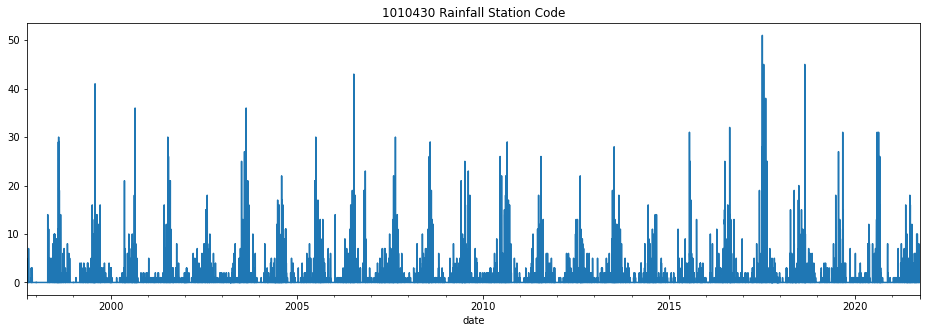

In [41]:
df_rainfall_total[df_rainfall_total.columns[0]].plot(figsize=(16,5), title=df_rainfall_total.columns[0]+' Rainfall Station Code')

<AxesSubplot:title={'center':'1010440 Rainfall Station Code'}, xlabel='date'>

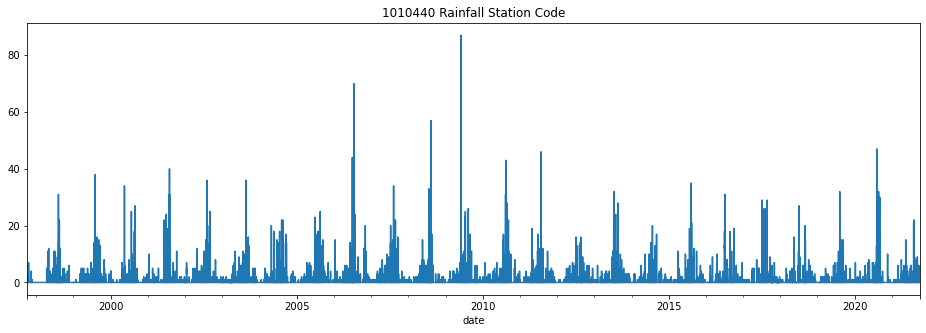

In [44]:
df_rainfall_total[df_rainfall_total.columns[1]].plot(figsize=(16,5), title=df_rainfall_total.columns[1]+' Rainfall Station Code')

<AxesSubplot:title={'center':'1010470 Rainfall Station Code'}, xlabel='date'>

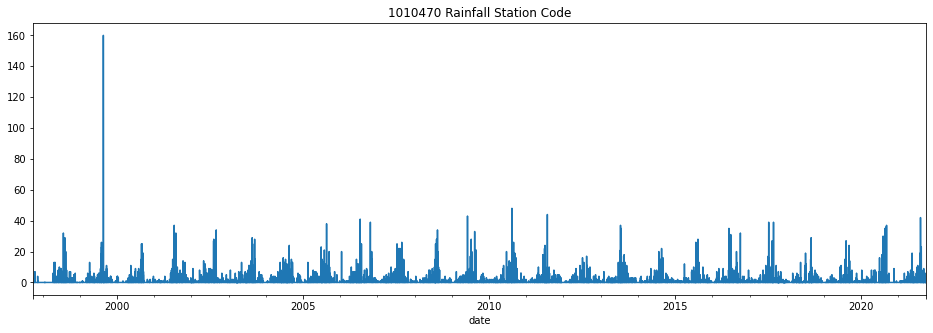

In [45]:
df_rainfall_total[df_rainfall_total.columns[2]].plot(figsize=(16,5), title=df_rainfall_total.columns[2]+' Rainfall Station Code')

## 결측자료 보완하기

In [57]:
df_rainfall_total.fillna(int(0), inplace=True)

In [58]:
df_rainfall_total.isna().sum()

1010430    0
1010440    0
1010470    0
1011414    0
1011416    0
1011418    0
1011424    0
1011428    0
1011430    0
1011432    0
9000139    0
dtype: int64

In [59]:
df_rainfall_total

,1010430,1010440,1010470,1011414,1011416,1011418,1011424,1011428,1011430,1011432,9000139
date,,,,,,,,,,,
1997-10-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-10-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-10-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-10-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-10-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-30 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-30 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
df_rainfall_total.to_csv("total_rainfall.csv")

## 유입량

In [74]:
stations_obs_list = sorted( glob(f'data\\time_series\\inflow\\*\\*.csv') , key = lambda x : x.split('/')[-1] )
stations_obs_list

['data\\time_series\\inflow\\daily\\daily_inflow_f.csv',
 'data\\time_series\\inflow\\hourly\\hourly_inflow_f.csv']

In [75]:
daily_inflow = pd.read_csv(stations_obs_list[0])
daily_inflow

,OBSYMD,inflow(cms)
0,19971001,45.200
1,19971002,33.600
2,19971003,30.100
3,19971004,28.500
4,19971005,26.600
...,...,...
8761,20210926,27.409
8762,20210927,21.100
8763,20210928,20.450
8764,20210929,32.394


In [76]:
df_check = pd.DataFrame(
    {'date': pd.date_range(start='1997-10-01', end='2021-9-30', freq='1D')
    }
).set_index('date')
df_check

""
date
1997-10-01
1997-10-02
1997-10-03
1997-10-04
1997-10-05
...
2021-09-26
2021-09-27
2021-09-28


In [77]:
df_check["inflow(cms)"] = daily_inflow["inflow(cms)"].values

In [79]:
df_check.to_csv("daily_inflow.csv")

In [80]:
hourly_inflow = pd.read_csv(stations_obs_list[1])
hourly_inflow

,OBSDH,inflow(cms)
0,1997100101,131.800
1,1997100102,1.600
2,1997100103,1.600
3,1997100104,131.600
4,1997100105,1.600
...,...,...
210279,2021093020,67.068
210280,2021093021,62.165
210281,2021093022,0.000
210282,2021093023,143.333


In [81]:
df_check = pd.DataFrame(
    {'date': pd.date_range(start='1997-10-01 01:00:00', end='2021-10-01 00:00:00', freq='1h')
    }
).set_index('date')
df_check

""
date
1997-10-01 01:00:00
1997-10-01 02:00:00
1997-10-01 03:00:00
1997-10-01 04:00:00
1997-10-01 05:00:00
...
2021-09-30 20:00:00
2021-09-30 21:00:00
2021-09-30 22:00:00


In [82]:
datatime_range = []
for date in df['OBSDH']:
    if int(str(date)[8:10]) == 24:
        hour = int(0)
        datetimeobj = datetime.datetime(int(str(date)[0:4]), int(str(date)[4:6]), int(str(date)[6:8]), hour, int(0), int(0))
        datetimeobj = datetimeobj + timedelta(days=1)
    else:
        datetimeobj = datetime.datetime(int(str(date)[0:4]), int(str(date)[4:6]), int(str(date)[6:8]), int(str(date)[8:10]), int(0), int(0))
        
    datatime_range.append(datetimeobj)

In [83]:
df['date'] = datatime_range
df

,OBSDH,inflow(cms),date
0,1997100101,131.800,1997-10-01 01:00:00
1,1997100102,1.600,1997-10-01 02:00:00
2,1997100103,1.600,1997-10-01 03:00:00
3,1997100104,131.600,1997-10-01 04:00:00
4,1997100105,1.600,1997-10-01 05:00:00
...,...,...,...
210279,2021093020,67.068,2021-09-30 20:00:00
210280,2021093021,62.165,2021-09-30 21:00:00
210281,2021093022,0.000,2021-09-30 22:00:00
210282,2021093023,143.333,2021-09-30 23:00:00


In [84]:
df_hourly_inflow = pd.DataFrame({"inflow(cms)": df['inflow(cms)'].values}, index=df['date'])
df_hourly_inflow

,inflow(cms)
date,
1997-10-01 01:00:00,131.800
1997-10-01 02:00:00,1.600
1997-10-01 03:00:00,1.600
1997-10-01 04:00:00,131.600
1997-10-01 05:00:00,1.600
...,...
2021-09-30 20:00:00,67.068
2021-09-30 21:00:00,62.165
2021-09-30 22:00:00,0.000


In [85]:
df_f = pd.merge(df_check, df_hourly_inflow, on="date", how='left')
df_f

,inflow(cms)
date,
1997-10-01 01:00:00,131.800
1997-10-01 02:00:00,1.600
1997-10-01 03:00:00,1.600
1997-10-01 04:00:00,131.600
1997-10-01 05:00:00,1.600
...,...
2021-09-30 20:00:00,67.068
2021-09-30 21:00:00,62.165
2021-09-30 22:00:00,0.000


In [86]:
df_f.to_csv("hourly_inflow.csv")